<h1 style = 'color:blue;text-align:center';> ISAT 341: Machine Learning and Data Science </h1>
<h2 style = 'color:purple;text-align:center';> Project: Machine Learning Confidential Sensor Data</h2>
<img src='images/machine_learning.jpg' width=200; height=200>
<h3 style = 'color:teal;text-align:center';> Working with real-world datasets<h3>

### Objectives
#### To demonstrate the ability to complete an end-to-end data science / machine learning project using real-world data by following and implementing the main machine learning checklist steps that lead to a solution, namely:
- Frame the problem and look at the big picture.
- Get the data.
- Explore the data to gain insights.
- Prepare the data to expose the underlying data patterns to Machine Learning algorithms.
- Explore many different models and short-list the best ones.
- Fine-tune your models and combine them into a great solution.
- Present your solution.
- Launch, monitor, and maintain your system

### Frame the problem

<img src='images/sensor_array.jpg' width=200; height=200>

### Sensor Data
The data source as well as the exact nature of the data is confidential. Each data instance contains 12 real-valued input attributes. Each input
attribute represents a sensor designed to detect the presence of one of two groups of substances. As an alternative, the sensor readings may
represent a 'false alarm'.
- Substance 1 is represented by the value 'one' in the class attribute column.
- Substance 2 is represented by the value 'two' in the class attribute column.
- A false alarm is represented by the value 'three' in the class attribute column.
The problem is framed as a supervised learning problem: Predict the class of a substance from sensor data using the given measurements in
the dataset

In [1]:
# import packages
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)

## Exploratory Data Analysis
### 1) TO DO: Use Pandas to load your data into a dataframe

Display the first ten rows after you load the data.

In [2]:
df = pd.read_csv('data/Sensor_Data_Confidential_341Project_DataSet6 (1).csv')
df.head(10)

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,4.406,0.6116,5.691,5.906,1.763,2.726,0.9607,0.6055,1.859,5.083,5.503,0.7544,one
1,4.680,0.5322,5.461,5.923,1.589,2.799,0.9937,0.6250,1.821,5.099,5.601,0.9546,one
2,4.738,0.5298,5.680,5.916,1.844,2.798,1.0280,0.6238,1.759,5.127,5.535,0.7275,one
3,4.503,0.5273,5.703,-9999.000,1.711,2.856,1.1500,0.6201,1.736,5.094,5.452,0.7690,one
4,4.744,0.5884,5.532,5.911,1.792,2.886,1.0310,0.5627,1.868,4.989,5.382,0.6665,one
5,4.524,0.6311,5.773,5.822,1.803,2.800,1.0490,0.6836,1.885,5.100,5.479,0.6958,one
6,4.570,0.4834,5.804,5.887,1.708,2.894,1.0830,0.4919,1.807,5.062,5.336,0.8447,one
7,4.489,0.5054,5.790,5.900,1.849,2.919,0.9082,0.6055,1.809,5.216,5.555,0.6897,one
8,4.503,0.6091,5.686,5.892,1.714,2.822,1.0300,0.6079,1.840,5.001,5.360,0.9521,one
9,4.425,0.6091,5.732,5.912,1.793,2.726,1.0950,0.6104,1.749,5.020,5.514,0.8081,one


### 2) TO DO: Use the dataframe describe method dataframe.describe() to display some summary statistics

In [3]:
df.describe()

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
count,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000,1965.000000
mean,-118.477820,-115.190205,-101.885998,-81.856424,-116.071233,-115.554978,-85.817986,-131.942065,-100.919491,-73.600490,-89.802421,-72.618565
std,1098.964058,1075.906369,1028.917998,926.674967,1075.810024,1075.866400,926.304277,1142.867792,1003.960864,870.738138,953.021476,870.830680
min,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000
25%,3.052000,0.800800,4.852000,3.937000,0.461400,0.648200,0.307600,0.185500,0.423600,1.427000,1.107000,0.787400
50%,4.075000,1.488000,5.326000,5.013000,0.784900,1.572000,0.538300,0.290500,0.679900,1.965000,1.273000,4.867000
75%,4.496000,2.906000,5.583000,5.555000,1.238000,2.136000,0.913100,0.454100,1.124000,4.915000,1.807000,5.399000
max,5.105000,4.675000,5.944000,6.011000,2.571000,3.638000,2.446000,1.199000,2.278000,5.312000,5.640000,20.000000


### Comments on above summary of data
Examine the data and note that when a sensor temporarily goes offline, it records a BAD data value of -9999. This can be seen in the minimum
recorded values for each sensor. Before we continue our preliminary data analysis, this bad data must be removed.
You should also take note of the count, mean, standard deviation and the maximum data values for each sensor. The bad data value
recordings when the senors go offline have a large impact on these simple descriptive statistical summaries. Also, the wide range of the data
values will require some sort of scaling of the data before training a machine learing model.
Finally, the class labels are not numeric but are strings ('one', 'two' and 'three') that we call categorical class labels. We will need to convert
them to integers before we feed them to a classifier.

## Data Cleansing
### 3) TO DO: Display the shape of your dataframe data in the cell below

In [4]:
df.shape

(1965, 13)

### 4) TO DO: Use Pandas dataframe to find bad or missing data.
The bad data can be located and replaced using pandas and numpy. In the cell below, use code to find and replace the bad data (-9999
values) with numpy nan values (nan means not a number). Then use the dataframe to drop the rows with the nan signatures. This may
significantly reduce your dataset size so you should display the shape of the data to see its new size. Also, again, display the first ten rows of
the data with the dataframe.
- Enter your code in the cell below to implement the drop, replace and display.
- Enter your code in the cell immediately following the output of the dataframe display to show the new shape of data in the
dataframe.

In [5]:
df = df.replace(-9999, np.nan)
df = df.dropna()
df.head(10)

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12,class
0,4.406,0.6116,5.691,5.906,1.763,2.726,0.9607,0.6055,1.859,5.083,5.503,0.7544,one
1,4.680,0.5322,5.461,5.923,1.589,2.799,0.9937,0.6250,1.821,5.099,5.601,0.9546,one
2,4.738,0.5298,5.680,5.916,1.844,2.798,1.0280,0.6238,1.759,5.127,5.535,0.7275,one
4,4.744,0.5884,5.532,5.911,1.792,2.886,1.0310,0.5627,1.868,4.989,5.382,0.6665,one
5,4.524,0.6311,5.773,5.822,1.803,2.800,1.0490,0.6836,1.885,5.100,5.479,0.6958,one
6,4.570,0.4834,5.804,5.887,1.708,2.894,1.0830,0.4919,1.807,5.062,5.336,0.8447,one
7,4.489,0.5054,5.790,5.900,1.849,2.919,0.9082,0.6055,1.809,5.216,5.555,0.6897,one
8,4.503,0.6091,5.686,5.892,1.714,2.822,1.0300,0.6079,1.840,5.001,5.360,0.9521,one
9,4.425,0.6091,5.732,5.912,1.793,2.726,1.0950,0.6104,1.749,5.020,5.514,0.8081,one
10,4.534,0.6287,5.411,5.896,1.760,3.008,1.1160,0.6116,1.854,4.971,5.503,0.7507,one


In [7]:
#shape of data after cleansing
df.shape

(1732, 13)

### 5) TO DO: Use pandas correlation method to find the two features (inputs) with the highest correlation
#### Enter your answers in the cell immediately following the output correlation table

In [24]:
df.corr(numeric_only=True)

,Input 1,Input 2,Input 3,Input 4,Input 5,Input 6,Input 7,Input 8,Input 9,Input 10,Input 11,Input 12
Input 1,1.000000,-0.594607,0.925093,0.938600,0.752668,0.892669,0.691514,0.665115,0.738312,0.686954,0.454579,-0.155881
Input 2,-0.594607,1.000000,-0.539680,-0.545516,-0.447404,-0.662066,-0.455466,-0.458217,-0.459051,-0.417590,-0.325162,-0.044529
Input 3,0.925093,-0.539680,1.000000,0.879927,0.638938,0.797819,0.582291,0.558866,0.635272,0.583224,0.383981,-0.156283
Input 4,0.938600,-0.545516,0.879927,1.000000,0.803925,0.860074,0.723526,0.711352,0.802887,0.751508,0.511918,-0.165669
Input 5,0.752668,-0.447404,0.638938,0.803925,1.000000,0.852378,0.924553,0.913517,0.971557,0.881586,0.697366,-0.219152
Input 6,0.892669,-0.662066,0.797819,0.860074,0.852378,1.000000,0.773119,0.761403,0.853061,0.801882,0.664157,-0.190464
Input 7,0.691514,-0.455466,0.582291,0.723526,0.924553,0.773119,1.000000,0.946761,0.874562,0.807780,0.526361,-0.234400
Input 8,0.665115,-0.458217,0.558866,0.711352,0.913517,0.761403,0.946761,1.000000,0.878703,0.806569,0.548836,-0.250512
Input 9,0.738312,-0.459051,0.635272,0.802887,0.971557,0.853061,0.874562,0.878703,1.000000,0.882846,0.762006,-0.239315
Input 10,0.686954,-0.417590,0.583224,0.751508,0.881586,0.801882,0.807780,0.806569,0.882846,1.000000,0.703079,-0.183873


### Input 5 and Input 9 are the two inputs most closely related

## Data Visualization
### 6) TO DO: Plot bar charts using pandas dataframe (plot the mean value of the sensors)

The mean values are:
Input 1     3.708112
Input 2     1.860839
Input 3     5.038686
Input 4     4.701443
Input 5     0.976114
Input 6     1.501182
Input 7     0.692307
Input 8     0.365517
Input 9     0.859494
Input 10    2.742349
Input 11    1.795423
Input 12    3.719455
dtype: float64


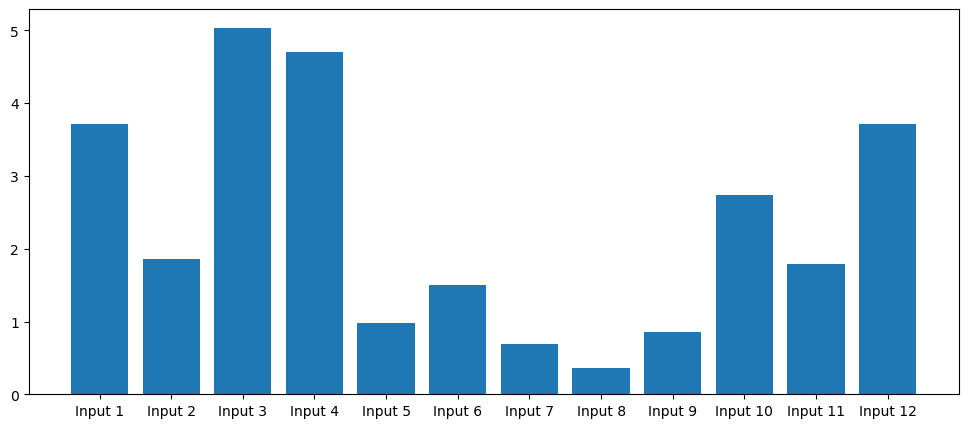

In [25]:
#get column names
columns = df.columns.tolist()

#excluse last column (class)
features=len(columns)-1
columns=columns[:features]

#get and print the means of all sensors 
print('The mean values are:\n{}'.format(df.mean(numeric_only=True)))

#store mean values
mean_values=df[:].mean(numeric_only=True)

#plot the data with bar charts
plt.figure(figsize=(12,5))
plt.bar(columns, mean_values )
plt.show()

## Data Preprocessing
### 7) TO DO: Create Feature Matrix and Target Vector
"Features" are also known as predictors, inputs, or attributes. The "response" is also known as the target, label, or output.

In [26]:
X=df[['Input 1', 'Input 2', 'Input 3', 'Input 4', 'Input 5', 'Input 6', 'Input 7', 'Input 8', 'Input 9', 'Input 10','Input 11', 'Input 12']].values
y=df['class'].values


### 8) TO DO: Convert the features dataframe to a numpy array

In [30]:
X_array = np.array(X)

### 9) TO DO: Label Encoding
Transform the categorical labels into integers using the scikit-learn label encoder

In [32]:
#import label encoder
from sklearn.preprocessing import LabelEncoder

# Assuming y is your target vector containing categorical class labels

#instantiate integer encoder
label_encoder = LabelEncoder()

#encode the class labels
y_encoded = label_encoder.fit_transform(y)

#print the categorical class labels we encoded (note the underscore)
print('Encoded classes:', label_encoder.classes_)

#print a few encoded values using python slice
print('Encoded values (slice):', y_encoded[:10])  # Example: Print the first 10 encoded values

#print the shape of the encoded classes
print('Encoded shape:', y_encoded.shape)


Encoded classes: ['one' 'three' 'two']
Encoded values (slice): [0 0 0 0 0 0 0 0 0 0]
Encoded shape: (1732,)


### 10) TO DO: Split the data into Training and Testing Sets
Scikit learn contains a function called the train_test_split function that will randomly shuffle the dataset and then splits it into two datasets: a
training set used to build the model and a test set to assess and evaluate how well the model works on unseen data (also called outof=sample data).
#### Use a 80% / 20% train/test split for this project.
NOTE: You must use the encoded class labels in this part

In [34]:
from sklearn.model_selection import train_test_split

# Assuming X_array is your feature matrix as a NumPy array and y_encoded is your encoded target vector

# Split the data into training and testing sets with an 80% / 20% split
X_train, X_test, y_train, y_test = train_test_split(X_array, y_encoded, test_size=0.2, random_state=42)

### 11) TO DO:Look at the shape of the data (rows and columns) after splitting it into training and testing sets

In [35]:
print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (1385, 12)
y_train shape: (1385,)


In [36]:
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_test shape: (347, 12)
y_test shape: (347,)


## Scale the Data
#### IMPORTANT: Standardizing the features:
Standardization of datasets (feature scaling) is a common requirement for many machine learning and optimization algorithms implemented in
scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data, i.e., Gaussian
with zero mean and unit variance.
### 12) TO DO: Let's use the StandarScaler from Scikit-learn to transform (scale) our feature

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### A comment on what the above code does 
Using the preceding code, we loaded the StandardScaler class from the preprocessing module and initialized a new StandardScaler object
that we assigned to the variable sc.
Using the fit method, StandardScaler estimated the parameters μ (sample mean) and (standard deviation) for each feature dimension
from the training data.
By calling the transform method, we then standardized the training data using those estimated parameters μ and .
Note that we used the same scaling parameters to standardize the test set so that both the values in the training and test dataset are
comparable to each other.
##### IMPORTANT: So from this point forward you must use the scaled training and testing data

## Model Building
#### Train multiple Machine Learning models during same session. You will use the three algorithms from previous labs.
1. K-Nearest Neighbor (with K=10, K=50, K=200)
2. Logistic Regression
3. Linear Support Vector Classifier

During the evaluation phase you must predict class member propbabilities and comment on what they mean.This means that scikit-learn’s
linear support vector classifier cannot be used for those prodictions since this model does not have a method to predict class membership
probabilities, but like the other models, it does have the same predict method.
- You MUST properly use model evaluation metrics (accuracy, confusion matrix, etc.)
- Two of your models (KNN and Logistic Regression MUST predict class membership probabilities and associated class label names

## Build a KNN Classification Model for K = 10, 50 and 200
### 13) TO DO: In the sections below you should build and train the actual machine learning model.
#### In the cell below: enter the code to import, instantiate, fit, predict and test the model's performance (accuracy) for the K-Nearest
Neighbor Model in SciKit-Learn for K= 10, 50 and 200. This should be completed in ONE cell using a loop, etc.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define the values of K
k_values = [10, 50, 200]

# Iterate over each K value and build/train/test the model
for k in k_values:
    # Instantiate the KNN classifier with the current K value
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model to the training data
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)
    
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for the current K value
    print(f'K = {k}, Accuracy = {accuracy:.4f}')


K = 10, Accuracy = 0.9769
K = 50, Accuracy = 0.9366
K = 200, Accuracy = 0.8617


#### Predicting class-membership probabilites
Scikit-Learn has a method that allows prediction of class member probabilities.
- The probability that training examples belong to a certain class can be computed using the predict_proba method. For example, we canpredict the probabilities of the first three samples in the test set as follows (NOTE: X_test_std[:3. :] means get the first 3 rows and the associated columns from the test dataset X_test):


In the cells below, your must predict the class-membership probabilities for each specified SINGLE ROW OF DATA
Also, you should recall that the label encoding that we implemented earlier resulted in the mapping:
class membership label indices after encoding

<p style="text-indent: 25px;"> 0 = 'one' (the Substance is Substance 1)</p>
<p style="text-indent: 25px;"> 1 = 'three' (false alarm)</p>
<p style="text-indent: 25px;"> 2 = 'two' (The Substance is Substance 2)</p>

### 14) TO DO:class-membership probability
Predict the class membership probability by using the a row with index = 10 from the X_test_std data. Make sure your print statement uses a
complete sentence and be sure to compare your prediction with the correct answer using the corresponding row from the test set labels, y_test.

In [39]:
# Assuming X_test_std is your standardized test data and knn_classifier is your trained KNN classifier

# Get the row with index = 10 from X_test_std
sample_row = X_test_std[10].reshape(1, -1)  # Reshape to a 2D array as required by predict_proba

# Predict the class membership probability for the sample row
class_probabilities = knn_classifier.predict_proba(sample_row)

# Print the predicted class membership probabilities
print(f"The predicted class membership probabilities for the sample row (index = 10) are:")
for class_label, probability in zip(knn_classifier.classes_, class_probabilities[0]):
    print(f"Class {class_label}: {probability:.4f}")

# Compare with the correct answer from y_test
correct_class = y_test[10]
print(f"\nThe correct class label from y_test for the sample row (index = 10) is: {correct_class}")


The predicted class membership probabilities for the sample row (index = 10) are:
Class 0: 0.9550
Class 1: 0.0000
Class 2: 0.0450

The correct class label from y_test for the sample row (index = 10) is: 2


In [40]:
# Assuming X_test_std is your standardized test data and knn_classifier is your trained KNN classifier

# Get the row with index = 125 from X_test_std
sample_row = X_test_std[125].reshape(1, -1)  # Reshape to a 2D array as required by predict_proba

# Predict the class membership probability for the sample row
class_probabilities = knn_classifier.predict_proba(sample_row)

# Print the predicted class membership probabilities
print("The predicted class membership probabilities for the sample row (index = 125) are:")
for class_label, probability in zip(knn_classifier.classes_, class_probabilities[0]):
    print(f"Class {class_label}: {probability:.4f}")

# Compare with the correct answer from y_test
correct_class = y_test[125]
print(f"\nThe correct class label from y_test for the sample row (index = 125) is: {correct_class}")


The predicted class membership probabilities for the sample row (index = 125) are:
Class 0: 0.9600
Class 1: 0.0000
Class 2: 0.0400

The correct class label from y_test for the sample row (index = 125) is: 2
